# Importing required packages/libraries


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Read the Country-data csv file.
df=pd.read_csv('Country-data.csv')
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Inspect the dataframe

In [4]:
df.shape

(167, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
#Converting exports,imports and health spending percentages to absolute values.
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Data Cleaning

In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
# Checking for null values in the column
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
# data cleaning checks
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [13]:
df.shape

(167, 10)

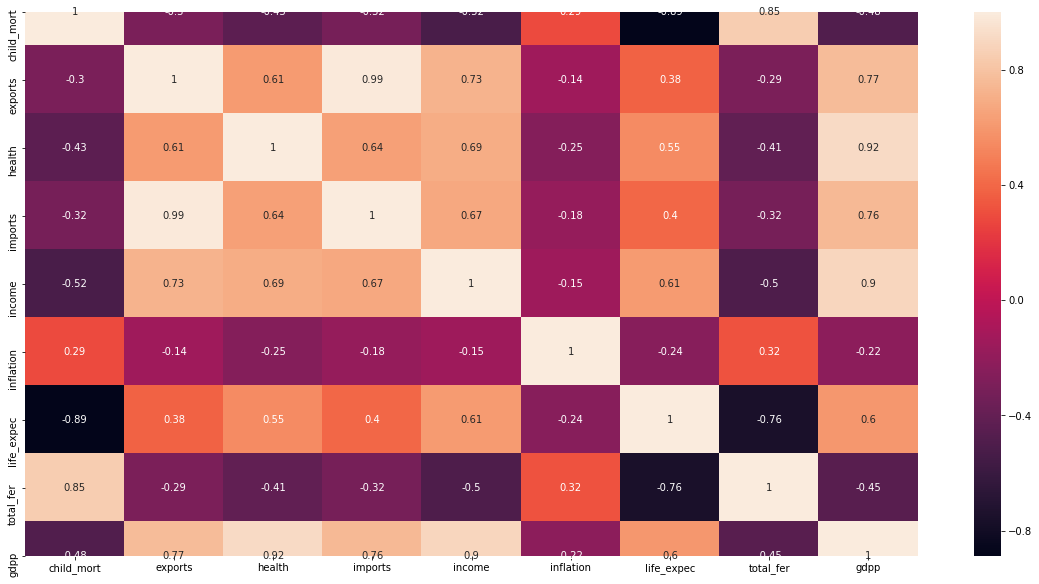

In [14]:
#first plot the correlation matrix and check if the data is indeed highly correlated
plt.figure(figsize = (20,10))        
sns.heatmap(df.corr(),annot = True)

We see high correlation between total_fer and child_mort, between gdpp and income,and between imports and exports

In [15]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [16]:
#numeric variable list
numeric_variables = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
print(numeric_variables)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


# Univariate Analysis

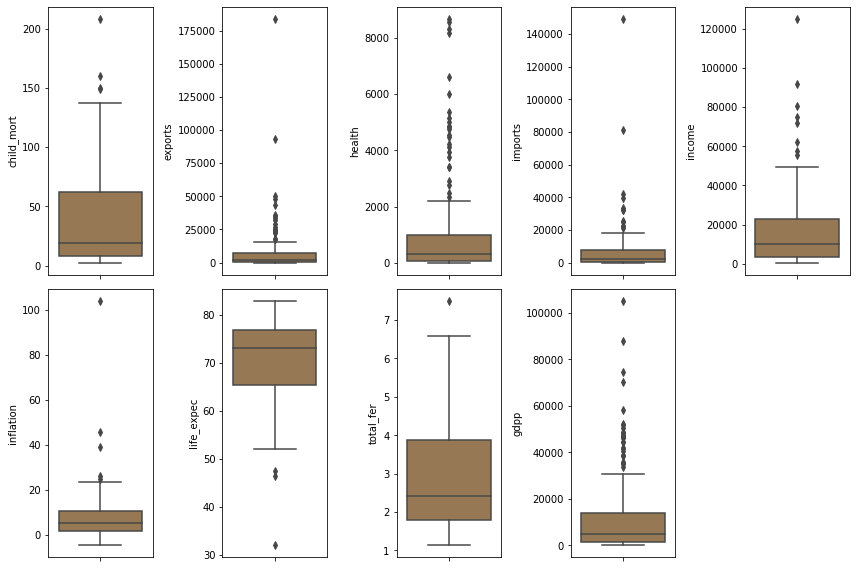

In [17]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

Clearly there are quite a few outliers in some of the variables. In some other scenarios, we would have gone ahead and dropped these outlier observations from the dataset since the clustering process is very sensitive to the presence of outliers in the data.

In [18]:
#Checking the skewness before treating the outliers
for i in numeric_variables:
    print(i+" ----> "+str(df[i].skew()))

child_mort ----> 1.4507735387555047
exports ----> 6.72017130199037
health ----> 2.5260287620853257
imports ----> 6.618499680938252
income ----> 2.231479607767527
inflation ----> 5.154049359697972
life_expec ----> -0.9709955819991258
total_fer ----> 0.9670916808050207
gdpp ----> 2.2180514519497163


In [19]:
#Treat the outliers

for col in numeric_variables:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]
df.shape


(167, 10)

In [20]:
#Checking the skewness and the skewness has reduced a bit for the capped columns
for i in numeric_variables:
    print(i+" ----> "+str(df[i].skew()))


child_mort ----> 1.2558779503405066
exports ----> 2.9573821121781148
health ----> 2.500466678753804
imports ----> 3.0019235338454253
income ----> 1.6923035011195668
inflation ----> 1.836806745037679
life_expec ----> -0.6860471206283151
total_fer ----> 0.9247774834800362
gdpp ----> 1.9008617370131637


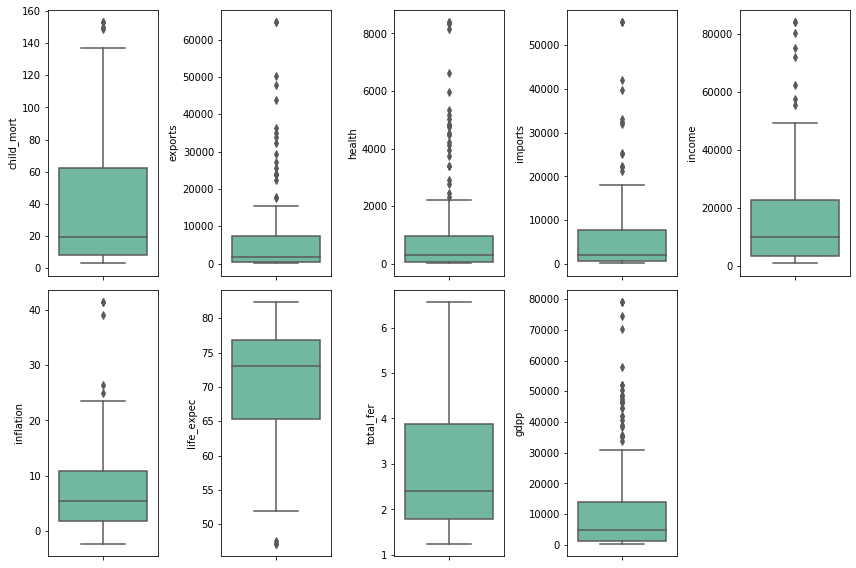

In [21]:
#Checking outliers reduced a bit for the capped columns
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

# Bivariate Analysis

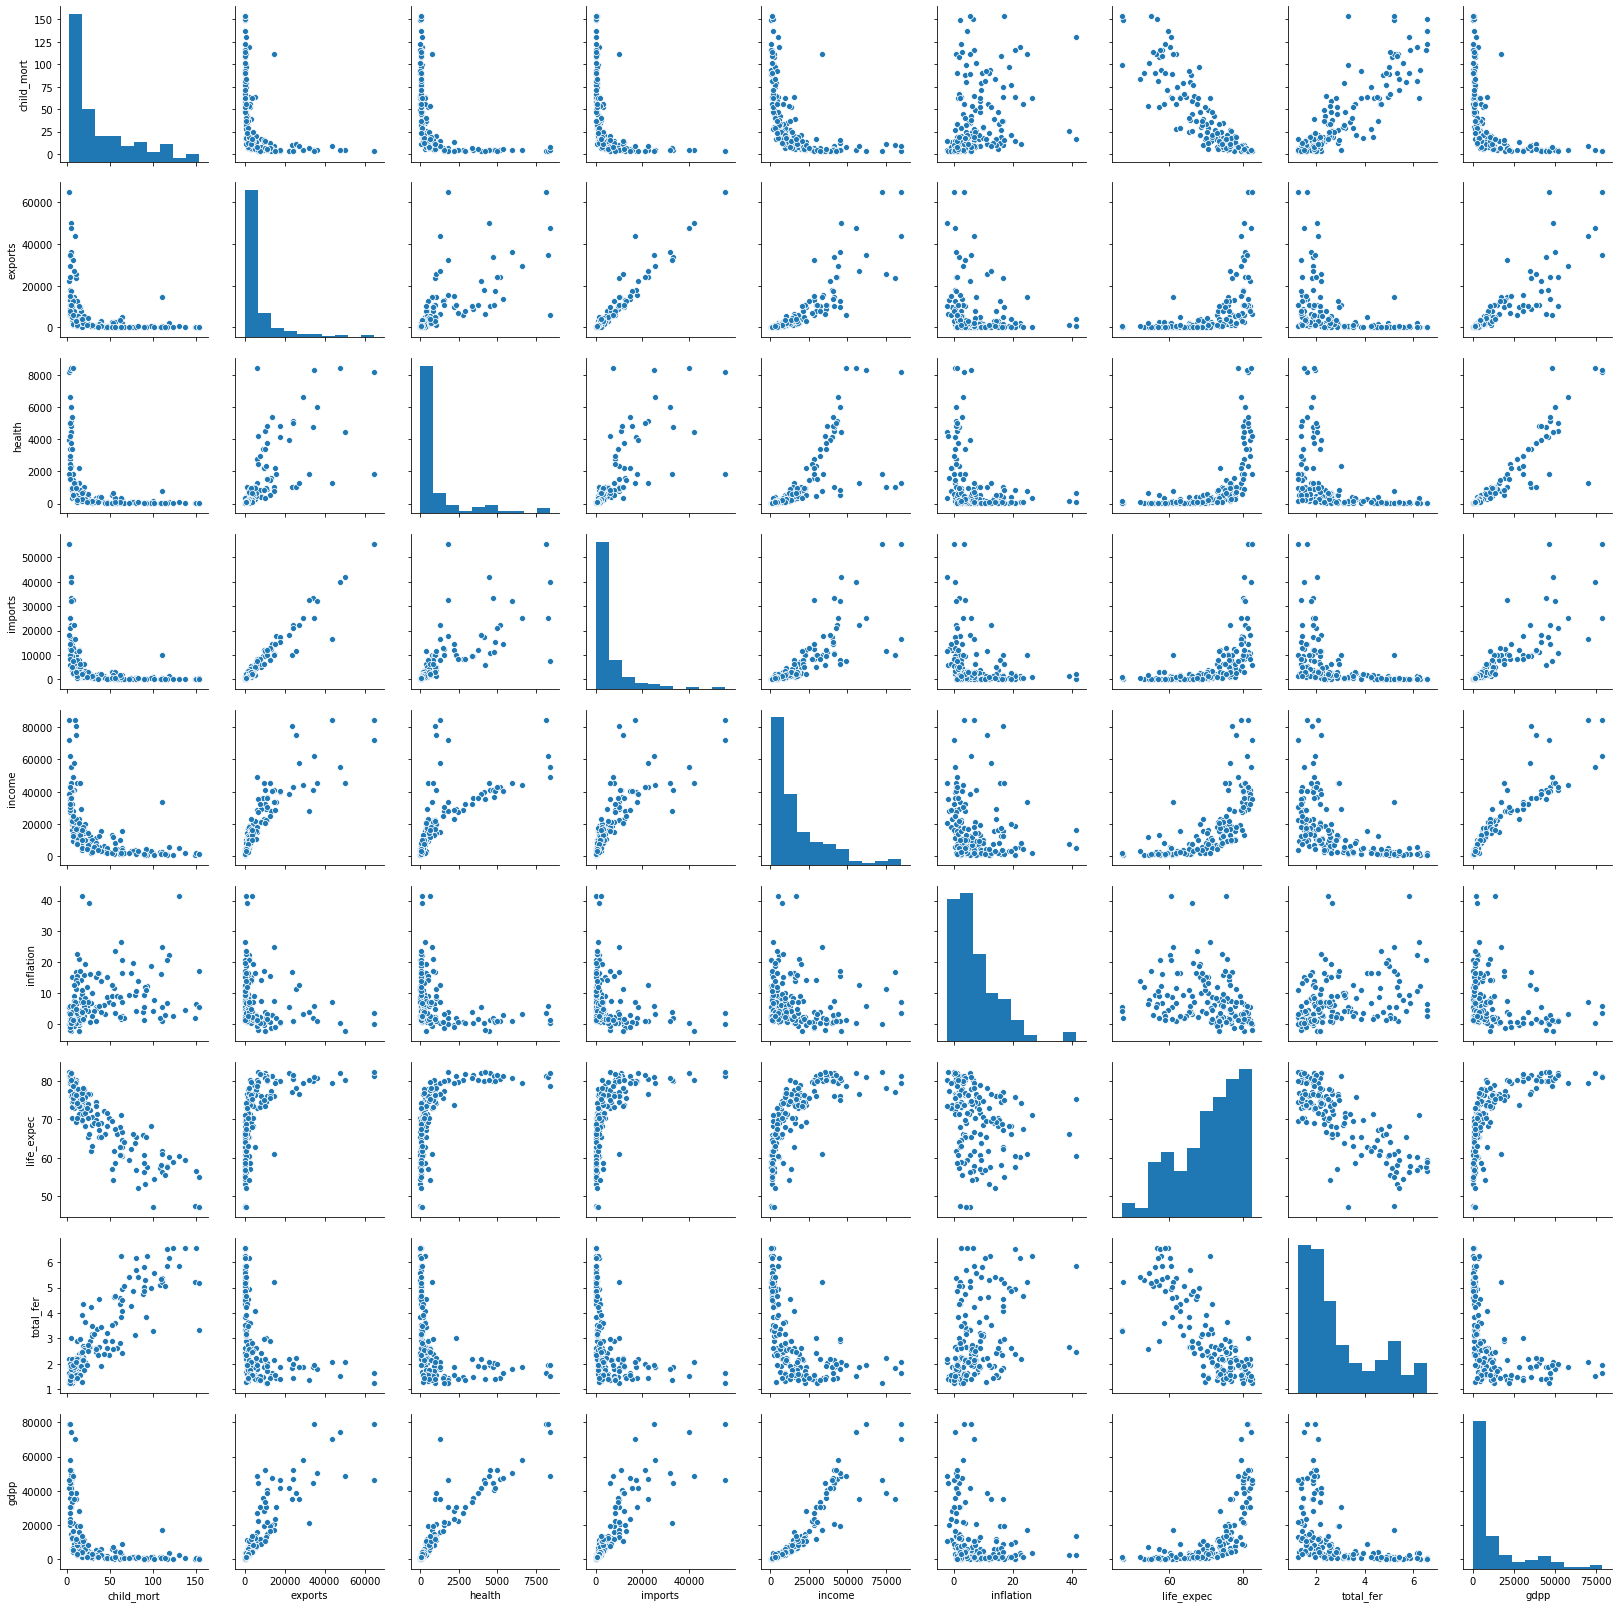

In [22]:
#Doing a pairplot to check some patterns and tendencies of clustering
sns.pairplot(vars=numeric_variables ,data=df)
plt.show()

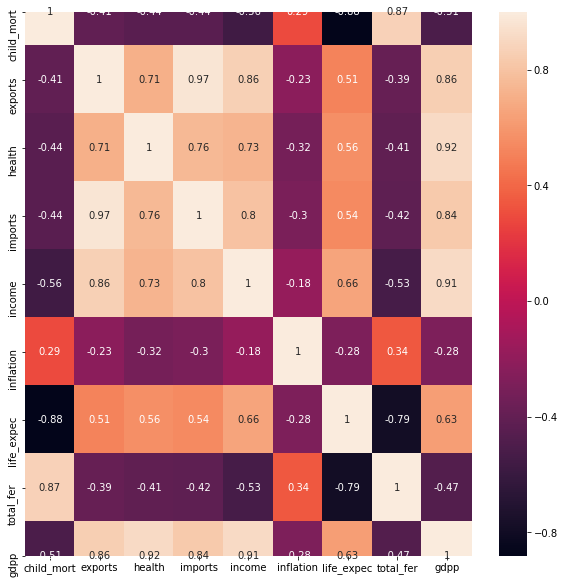

In [23]:
# Let us draw heatmap to understand the corelation after the outlier treatment.
plt.figure(figsize = (10,10))  
sns.heatmap(df.corr(),annot = True)

# Check if clustering can be done or not using Hopkins Statistics

In [24]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
# check the Hopkins measure
hopkins(df.drop(['country'],axis=1))

0.9187003870621049

The Hopkins Score is high and this means that there is a higher tendency to make clusters

In [26]:
country_df = df.copy()
country_df.shape

(167, 10)

In [27]:
country_df = country_df.drop('country', axis = 1)
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


# Scaling the Data

In [28]:
scaler = StandardScaler()
country_df= scaler.fit_transform(country_df)

In [29]:
country_df = pd.DataFrame(country_df)
country_df.columns =['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


# Clustering Algorithims (K-Means & Hierarchical) and Linkages(Single & Complete)

### Selecting the optimal cluster number

### First we'll do the silhouette score analysis

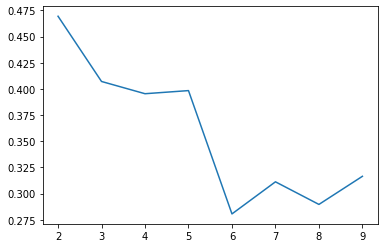

In [30]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_df)
    ss.append([k, silhouette_score(country_df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [31]:
n_of_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in n_of_clusters:
    kmeans = KMeans(n_clusters = i, max_iter=50)
    kmeans.fit(country_df[numeric_variables])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(country_df[numeric_variables], cluster_labels)
    print("For n_clusters = {0}, Silhouette score is {1}".format(i,silhouette_avg))

For n_clusters = 2, Silhouette score is 0.46939980287788113
For n_clusters = 3, Silhouette score is 0.40708993455880504
For n_clusters = 4, Silhouette score is 0.39539142309551445
For n_clusters = 5, Silhouette score is 0.3864288935632213
For n_clusters = 6, Silhouette score is 0.2923333043719359
For n_clusters = 7, Silhouette score is 0.3335607487901002
For n_clusters = 8, Silhouette score is 0.32296864497863975
For n_clusters = 9, Silhouette score is 0.29139629090916097
For n_clusters = 10, Silhouette score is 0.31822857871489063
For n_clusters = 11, Silhouette score is 0.2981865844566019
For n_clusters = 12, Silhouette score is 0.27412559167105227
For n_clusters = 13, Silhouette score is 0.2946827463090196
For n_clusters = 14, Silhouette score is 0.23131286766471368
For n_clusters = 15, Silhouette score is 0.2526141040614159


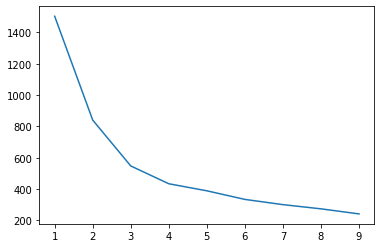

In [32]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_df)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

From both the methods above the optimal number of clusters that can be formed is 3.

# KMeans

In [33]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(country_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [34]:
kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [35]:
Std_Country = df.copy()

In [36]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [37]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns =['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp','cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [38]:
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [39]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

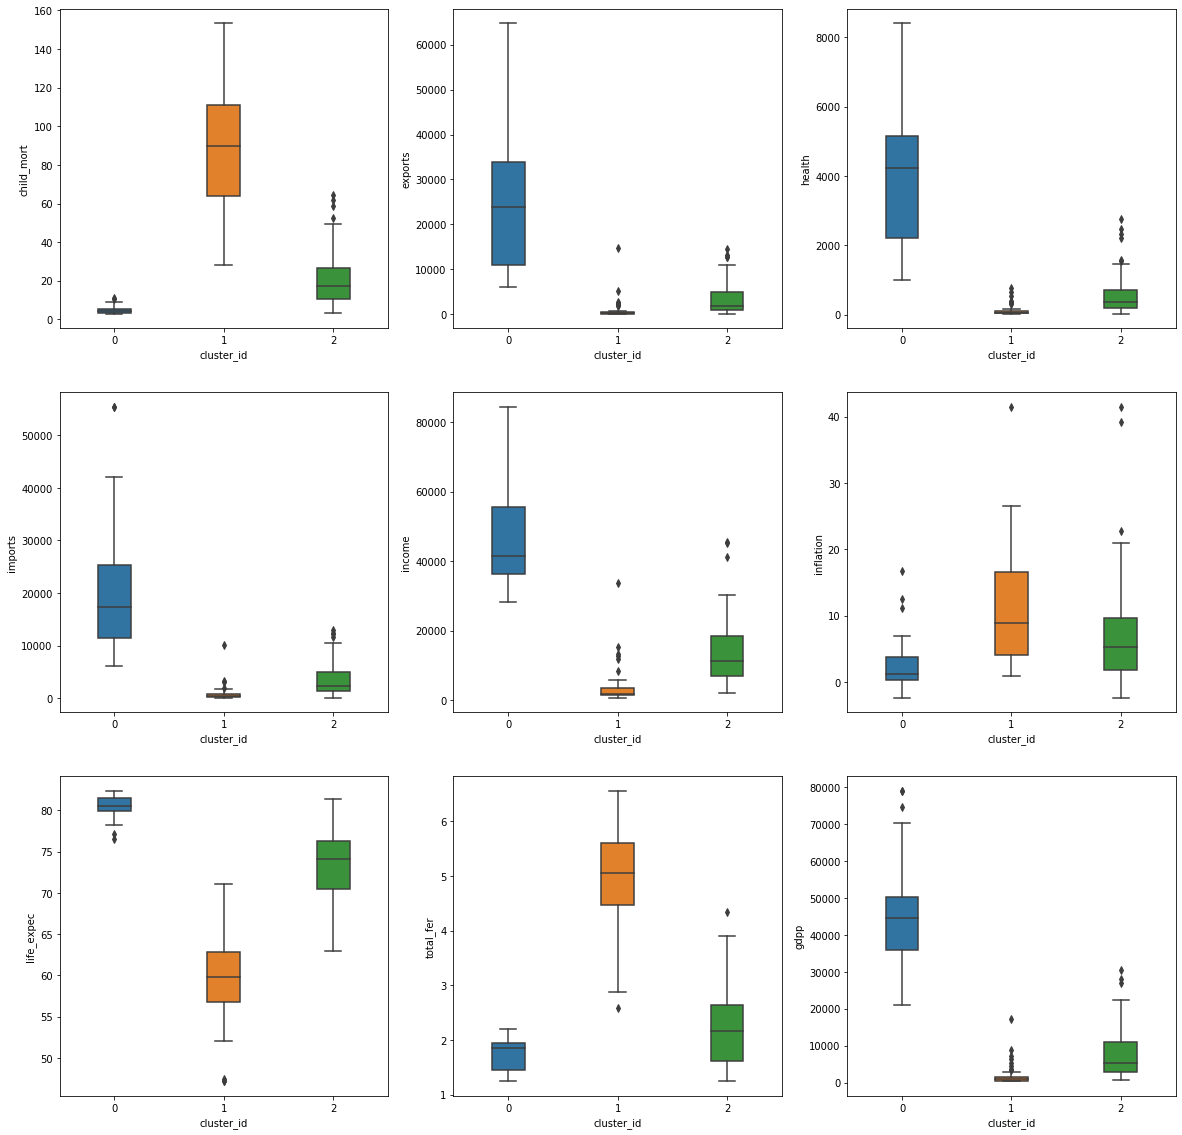

In [40]:
#Checking the distribution of the variables based on each cluster_id
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='cluster_id', y='child_mort', width=0.3, data=df_km, orient="v")
plt.subplot(332)
sns.boxplot(x='cluster_id', y='exports', width=0.3, data=df_km, orient="v")
plt.subplot(333)
sns.boxplot(x='cluster_id', y='health', width=0.3, data=df_km, orient="v")
plt.subplot(334)
sns.boxplot(x='cluster_id', y='imports', width=0.3, data=df_km, orient="v")
plt.subplot(335)
sns.boxplot(x='cluster_id', y='income', width=0.3, data=df_km, orient="v")
plt.subplot(336)
sns.boxplot(x='cluster_id', y='inflation', width=0.3, data=df_km, orient="v")
plt.subplot(337)
sns.boxplot(x='cluster_id', y='life_expec', width=0.3, data=df_km, orient="v")
plt.subplot(338)
sns.boxplot(x='cluster_id', y='total_fer', width=0.3, data=df_km, orient="v")
plt.subplot(339)
sns.boxplot(x='cluster_id', y='gdpp', width=0.3, data=df_km, orient="v")
plt.show()

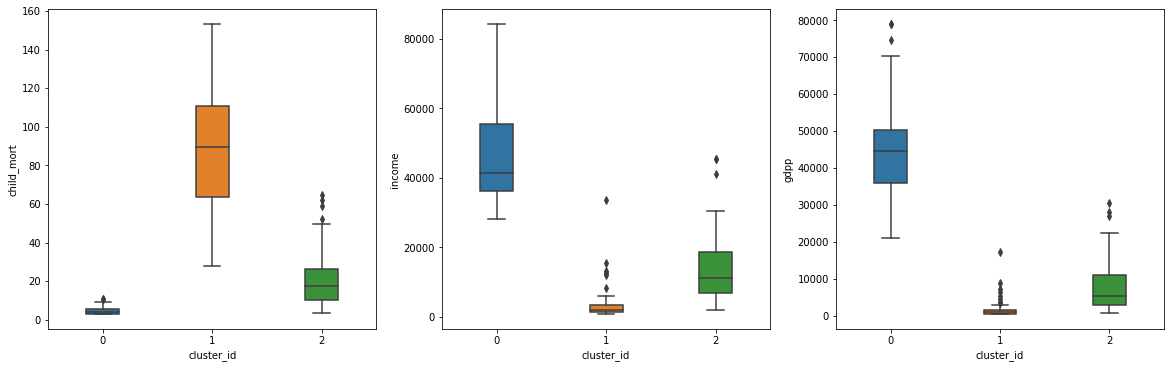

In [41]:
# Plot the Cluster with respect to the clusters obtained
#sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='cluster_id', y='child_mort', width=0.3, data=df_km, orient="v")
plt.subplot(332)
sns.boxplot(x='cluster_id', y='income', width=0.3, data=df_km, orient="v")
plt.subplot(333)
sns.boxplot(x='cluster_id', y='gdpp', width=0.3, data=df_km, orient="v")

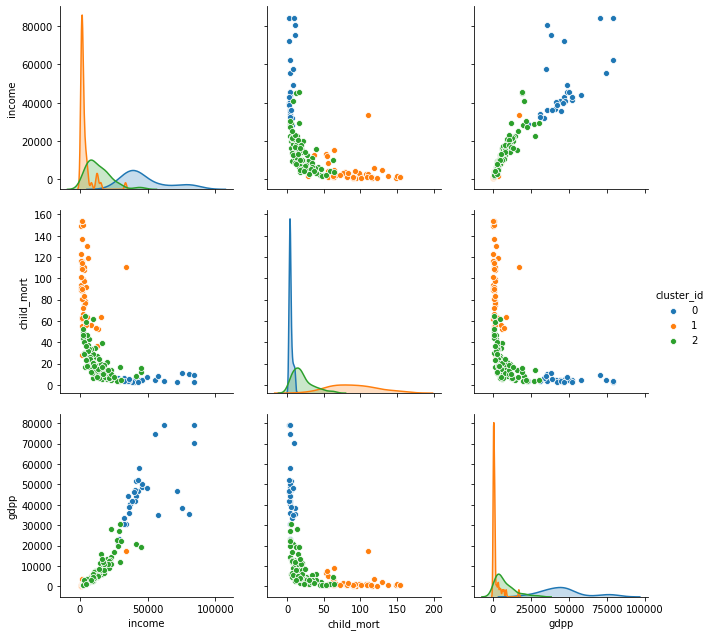

In [42]:
# Plot the Cluster with respect to the clusters obtained
sns.pairplot(x_vars=['income','child_mort','gdpp'], y_vars=['income','child_mort','gdpp'], hue='cluster_id', height=3, size=3, data=df_km)
plt.show()


# Cluster Profiling

In [43]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [44]:
d=[ 'exports', 'health', 'imports', 'inflation',
       'life_expec', 'total_fer']
df_km.drop(d, axis = 1).groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,4.989655,47784.413793,46068.137931
1,90.335417,3901.010000,1911.400833
2,20.547778,13804.333333,7808.577778


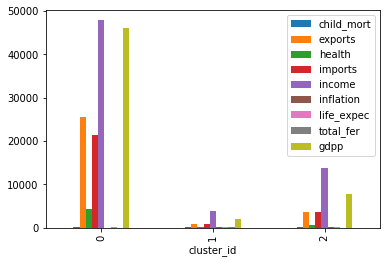

In [45]:
df_km.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

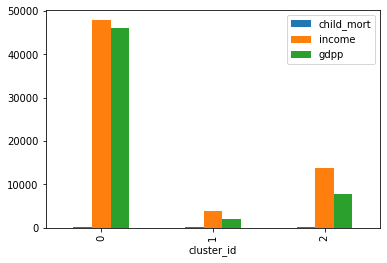

In [46]:
df_km.drop(d, axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

# Finding the observations that belong to certain cluster


In [47]:
df_km[df_km['cluster_id']==1]['country'].head()

0      Afghanistan
3           Angola
17           Benin
21        Botswana
25    Burkina Faso
Name: country, dtype: object

In [48]:
#The DataFrame at the end of clustering through K-Means
df_km[df_km['cluster_id']==1].sort_values(by=['gdpp',"income","child_mort"], ascending=[True, True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,1
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,1
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,1
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,1
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,1
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,1
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,1
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,1


# #Hierarchical Clustering

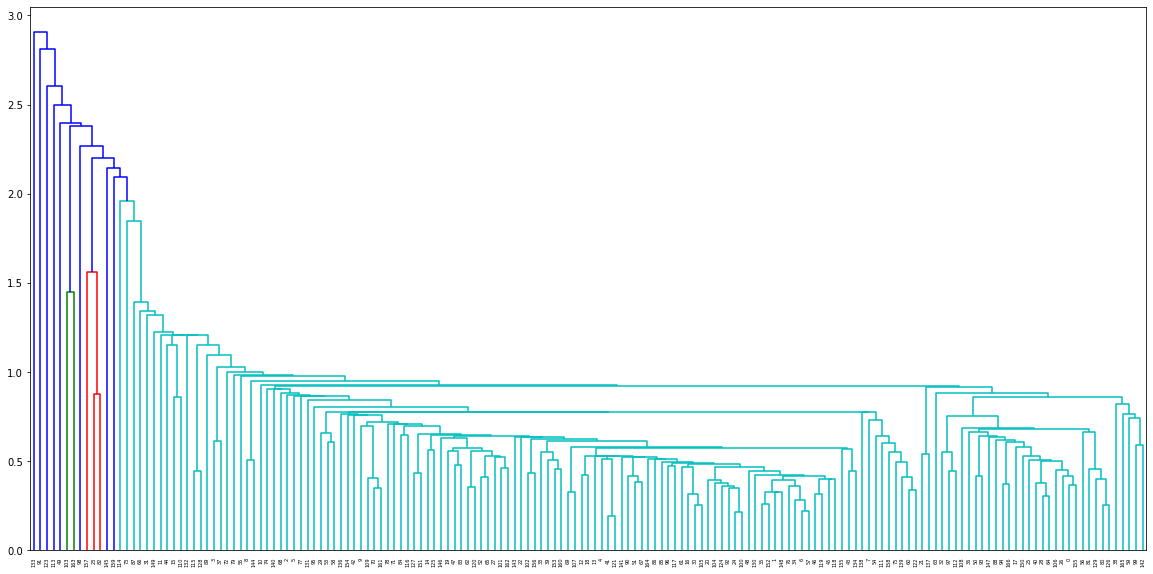

In [49]:
# heirarchical clustering single linkage method
fig = plt.figure(figsize = (20,10))
mergings = linkage(country_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

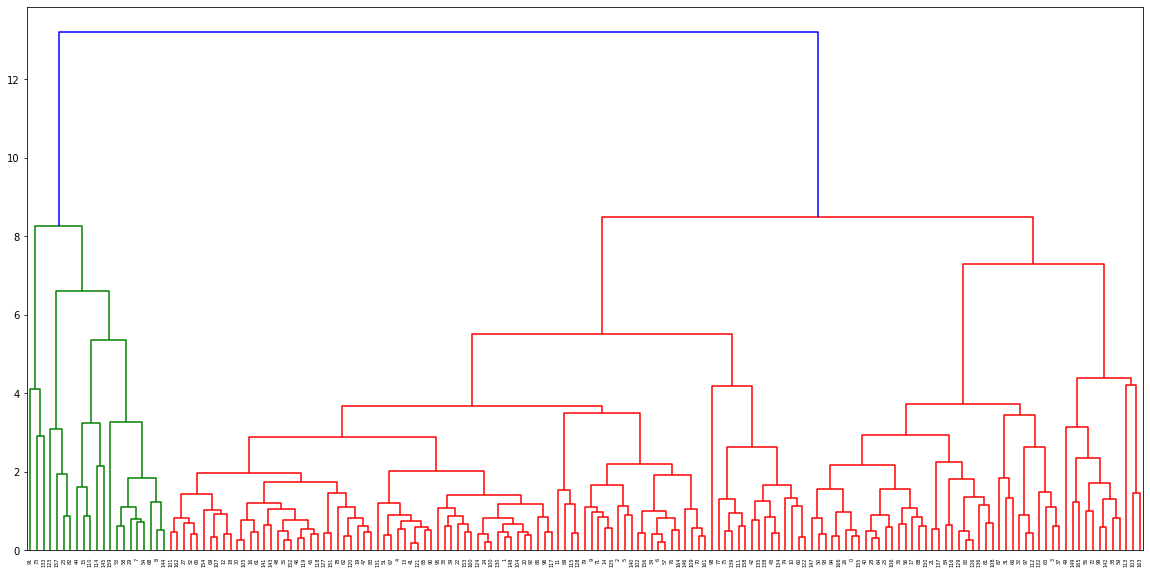

In [50]:
# complete linkage method
fig = plt.figure(figsize = (20,10))
mergings = linkage(country_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [51]:
# Segmenting the dataset into 10 clusters concatenating the cluster column to the dataframe
clusterlabels_ = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_hc = pd.concat([df_km, clusterlabels_], axis=1)
country_hc.columns = ['Country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','cluster_id','clusterlabels_']
country_hc.head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,clusterlabels_
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


<Figure size 1800x1800 with 0 Axes>

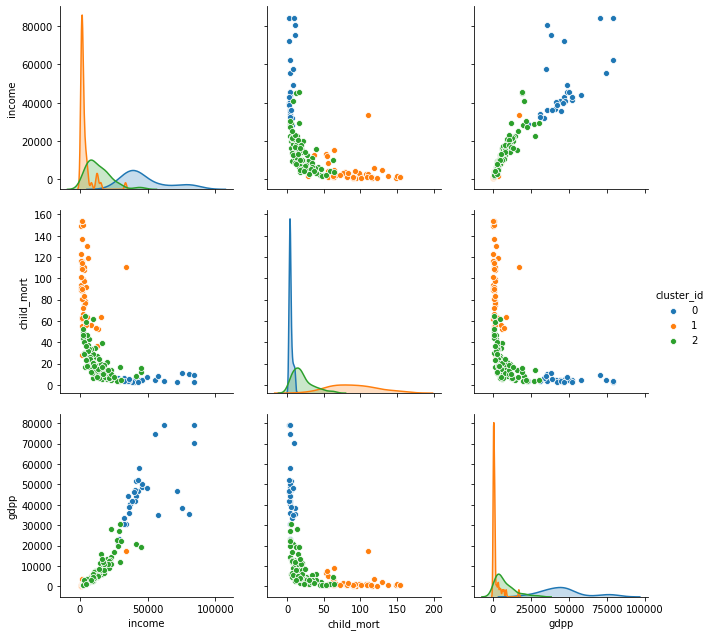

In [52]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=(25,25))
sns.pairplot(x_vars=['income','child_mort','gdpp'], y_vars=['income','child_mort','gdpp'], hue='cluster_id', height=3, size=3, data=country_hc)
plt.show()

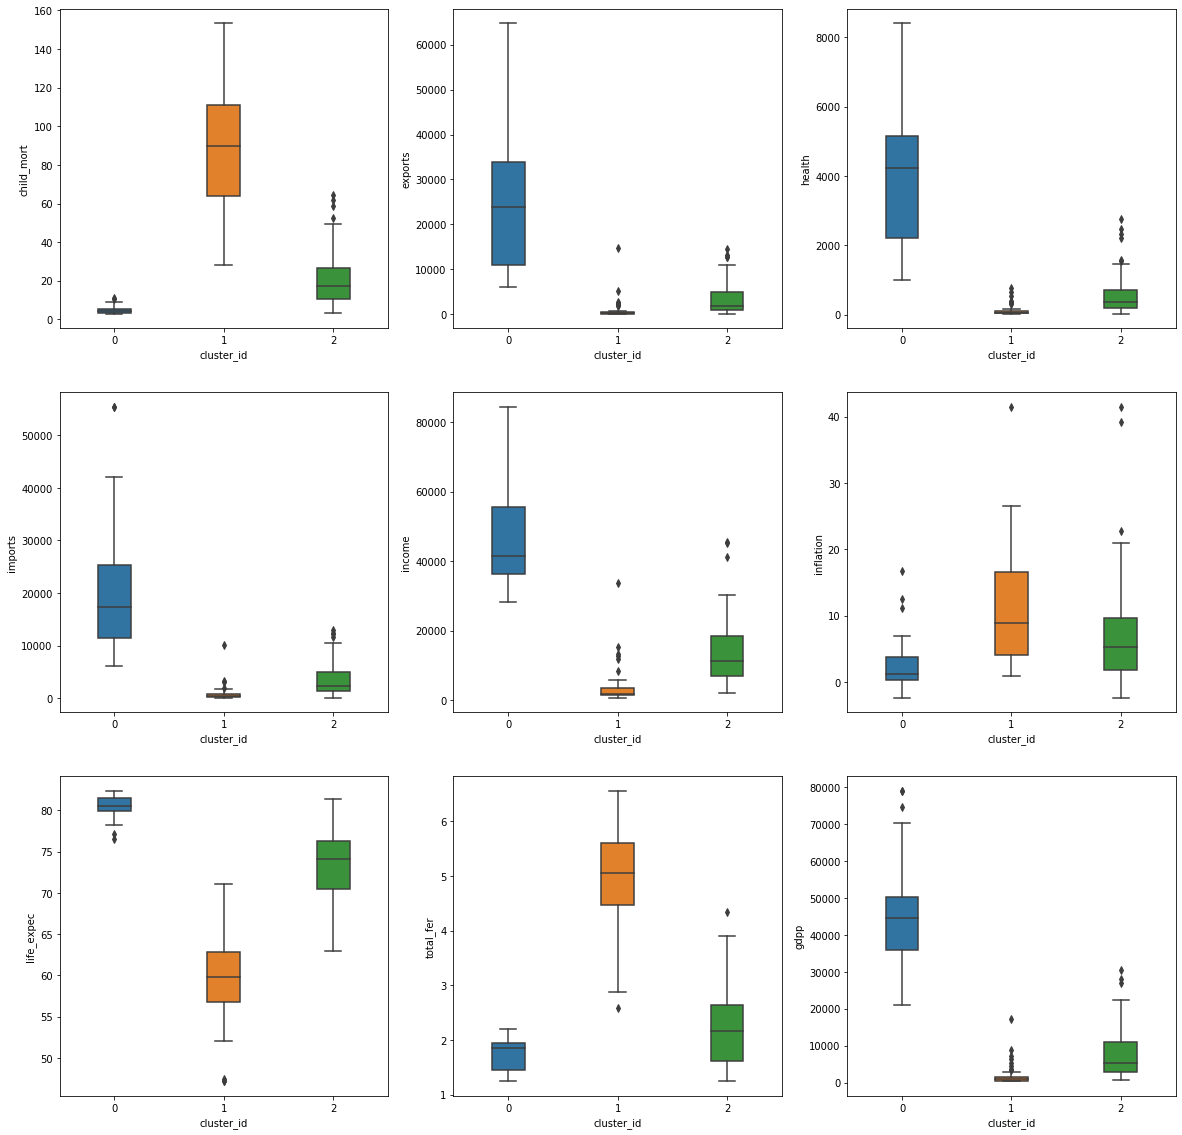

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='cluster_id', y='child_mort', width=0.3, data=country_hc, orient="v")
plt.subplot(332)
sns.boxplot(x='cluster_id', y='exports', width=0.3, data=country_hc, orient="v")
plt.subplot(333)
sns.boxplot(x='cluster_id', y='health', width=0.3, data=country_hc, orient="v")
plt.subplot(334)
sns.boxplot(x='cluster_id', y='imports', width=0.3, data=country_hc, orient="v")
plt.subplot(335)
sns.boxplot(x='cluster_id', y='income', width=0.3, data=country_hc, orient="v")
plt.subplot(336)
sns.boxplot(x='cluster_id', y='inflation', width=0.3, data=country_hc, orient="v")
plt.subplot(337)
sns.boxplot(x='cluster_id', y='life_expec', width=0.3, data=country_hc, orient="v")
plt.subplot(338)
sns.boxplot(x='cluster_id', y='total_fer', width=0.3, data=country_hc, orient="v")
plt.subplot(339)
sns.boxplot(x='cluster_id', y='gdpp', width=0.3, data=country_hc, orient="v")
plt.show()

In [54]:
d=[ 'exports', 'health', 'imports', 'inflation',
       'life_expec', 'total_fer','cluster_id']
country_hc.drop(d, axis = 1).groupby('clusterlabels_').mean()

,child_mort,income,gdpp
clusterlabels_,,,
0,87.586000,4229.169600,2157.944800
1,19.188542,15438.333333,9849.187500
2,5.176190,53421.333333,51289.333333


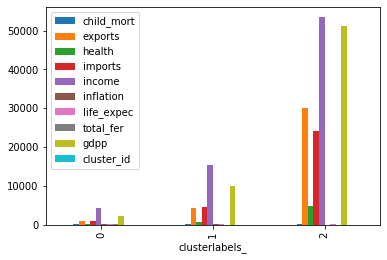

In [55]:
country_hc.drop('Country', axis = 1).groupby('clusterlabels_').mean().plot(kind = 'bar')


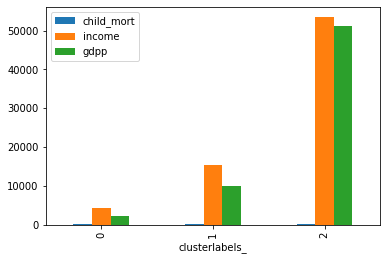

In [56]:
country_hc.drop(d, axis = 1).groupby('clusterlabels_').mean().plot(kind = 'bar')


In [57]:
country_hc[country_hc['clusterlabels_']==0]['Country'].shape

(50,)

In [58]:
country_hc[country_hc['clusterlabels_']==0].drop('cluster_id',axis=1).sort_values(by=['gdpp',"income","child_mort"], ascending=[True, True,False]).head(10)

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterlabels_
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,0


In [59]:
country_hc[country_hc['clusterlabels_']==0].drop('cluster_id',axis=1).sort_values(by=['gdpp',"income","child_mort"], ascending=[True, True,False]).head()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterlabels_
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


The order of preceedence given to the features is ggdp, child_mort and then the income and the top 5 countries are
1. Liberia
2. Burundi
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
